In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 18})

### data : https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [3]:
df = pd.read_csv('/Users/alenjose/Desktop/data/car_sales_linear_reg/vehicles.csv')

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum() / df.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [24]:
pd.DataFrame(df.description.value_counts())

description
35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! TA...          231
Call or text today to find out more. (602) 620-...          197
...                                                         ...
No Money Down Auto Loans!Answer 5 easy question...            1
Carvana is the safer way to buy a car During th...            1

[360911 rows x 1 columns]

In [61]:
pd.options.display.max_rows = 99

In [27]:
df.shape

(426880, 26)

In [37]:
# so we need to convert it to str to perform the function below
type(df['description'][0])

float

In [42]:
# 70 rows have no descriptions : 
df['description'].isna().sum()

70

In [47]:
pd.isna(df['description'][0])

True

In [48]:
def find_len(x):
    if(pd.isna(x)):
        length = 0
    else:
        length = len(x)
    return length

In [54]:
# def find_len(x):
#     if(pd.isna(x)):
#         length = 0
#     else:
#         words = x.split()
#         length = len(words)
#     return length

In [49]:
df['desc_length'] = df['description'].apply(lambda x:find_len(x))

In [65]:
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [75]:
df['cylinders'] = df['cylinders'].apply(lambda x:str(x).replace('cylinders','').strip())

In [76]:
df['cylinders'].value_counts()

nan      177678
6         94169
4         77642
8         72062
5          1712
10         1455
other      1298
3           655
12          209
Name: cylinders, dtype: int64

In [79]:
df['cylinders'] = pd.to_numeric(df['cylinders'],errors='coerce')

In [222]:
df['cylinders'].value_counts()

6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: cylinders, dtype: int64

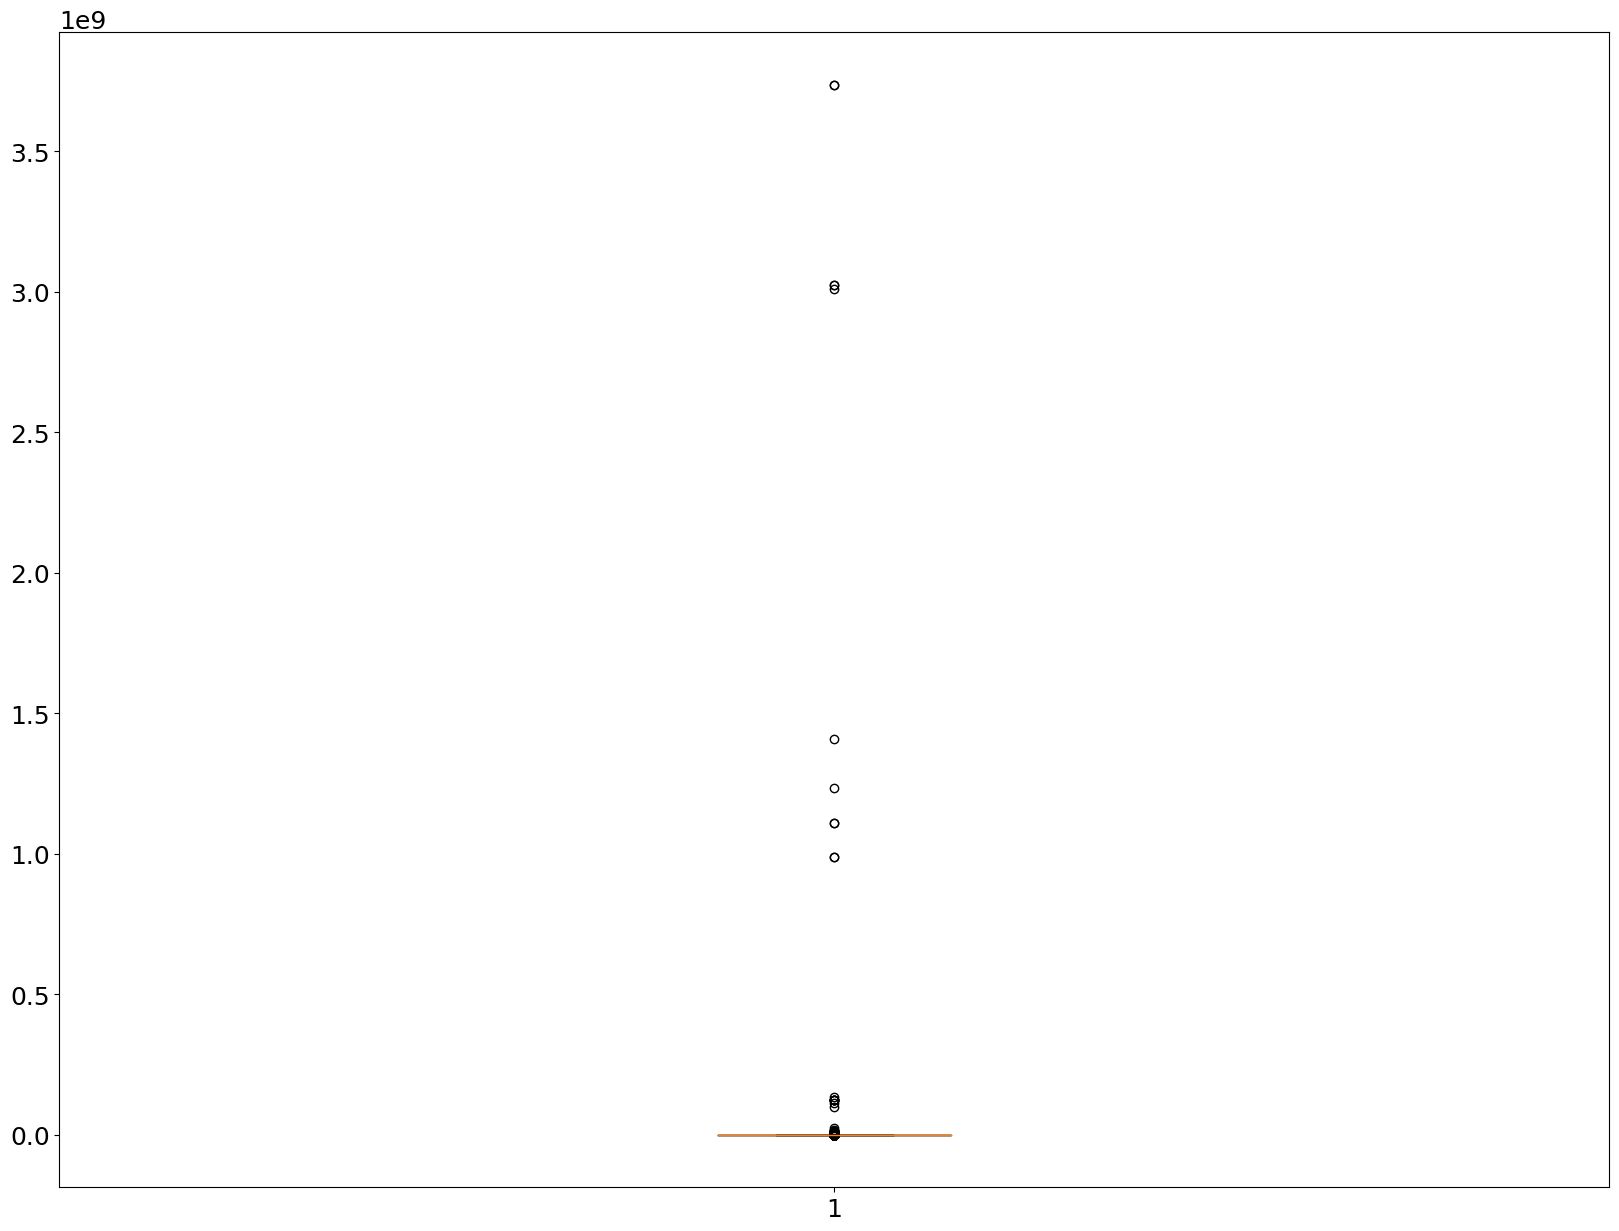

In [223]:
plt.boxplot(df['price'])
plt.show()

In [224]:
percentiles = np.percentile(df['price'], [5, 99.95])

# Find the outliers in the 'price' column
outliers = df[(df['price'] < percentiles[0]) | (df['price'] > percentiles[1])]

In [225]:
df1 = df[~df.index.isin(outliers.index)]

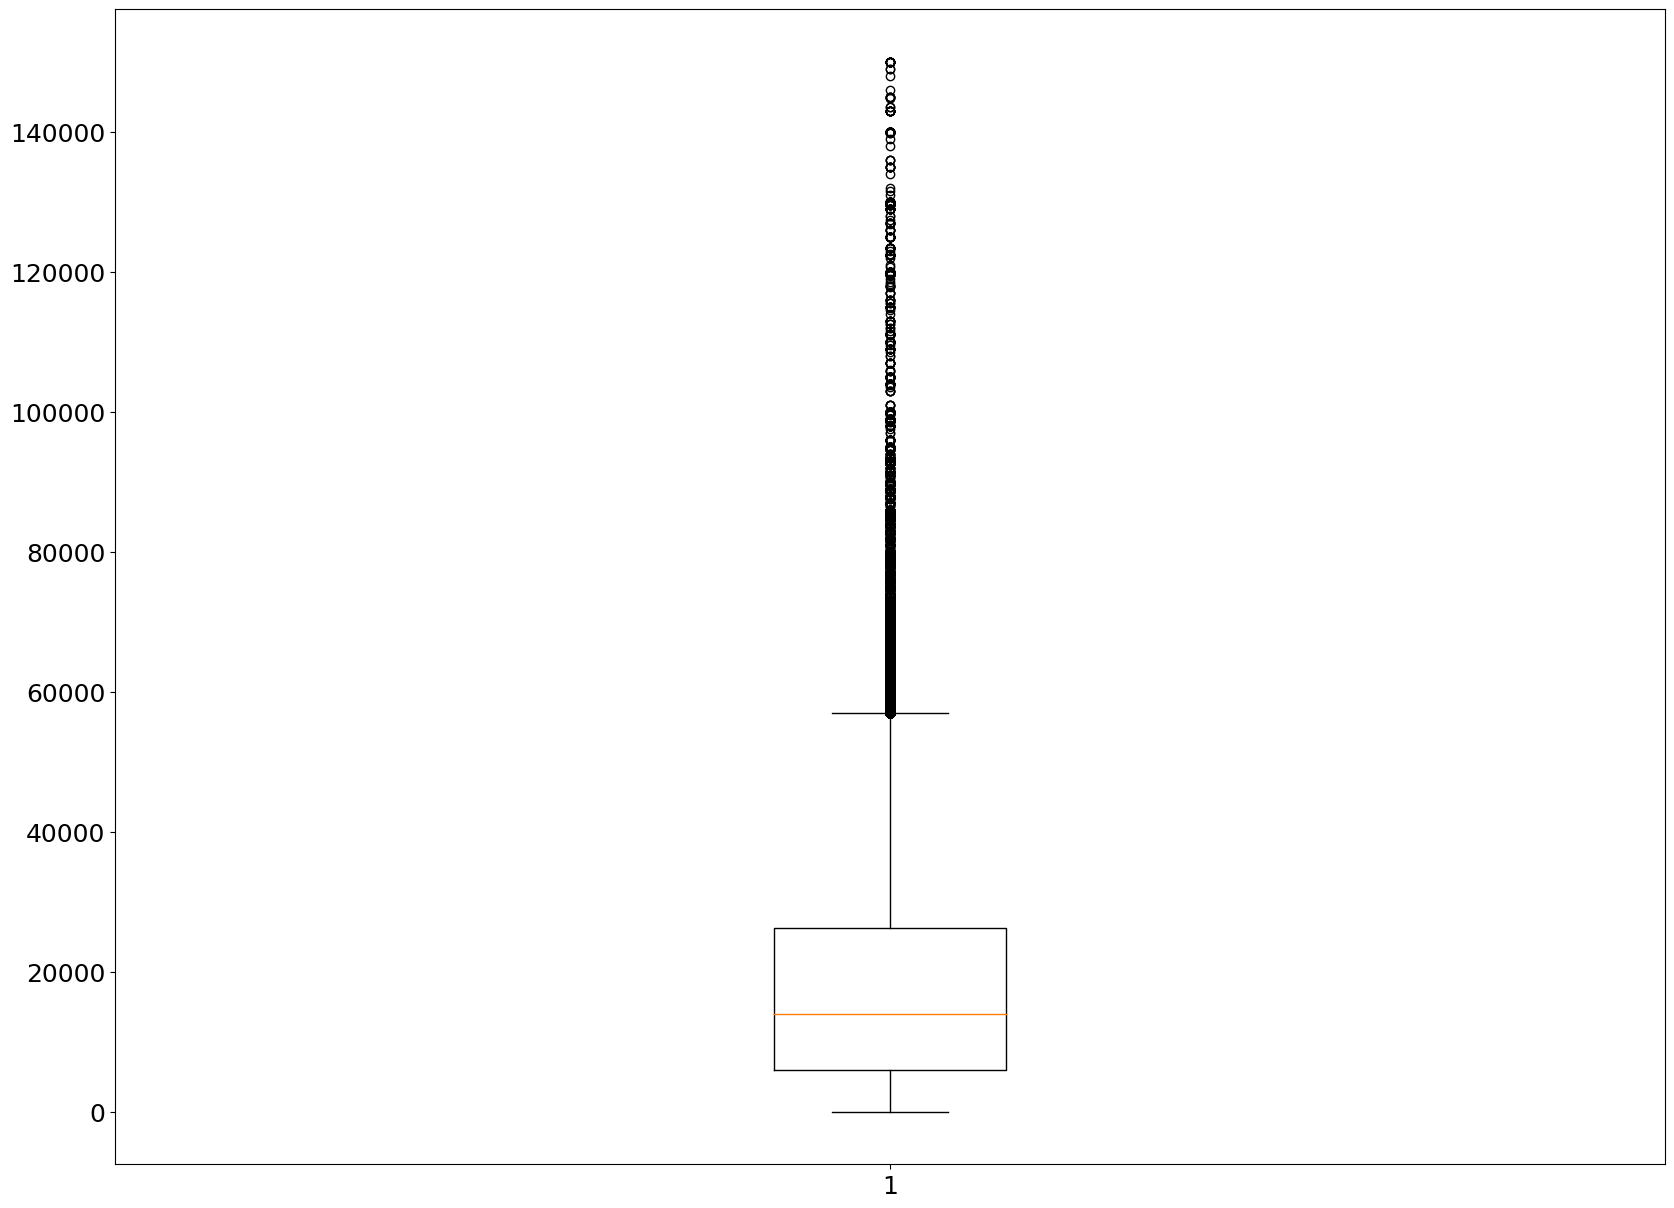

In [226]:
plt.boxplot(df1['price'])
plt.show()

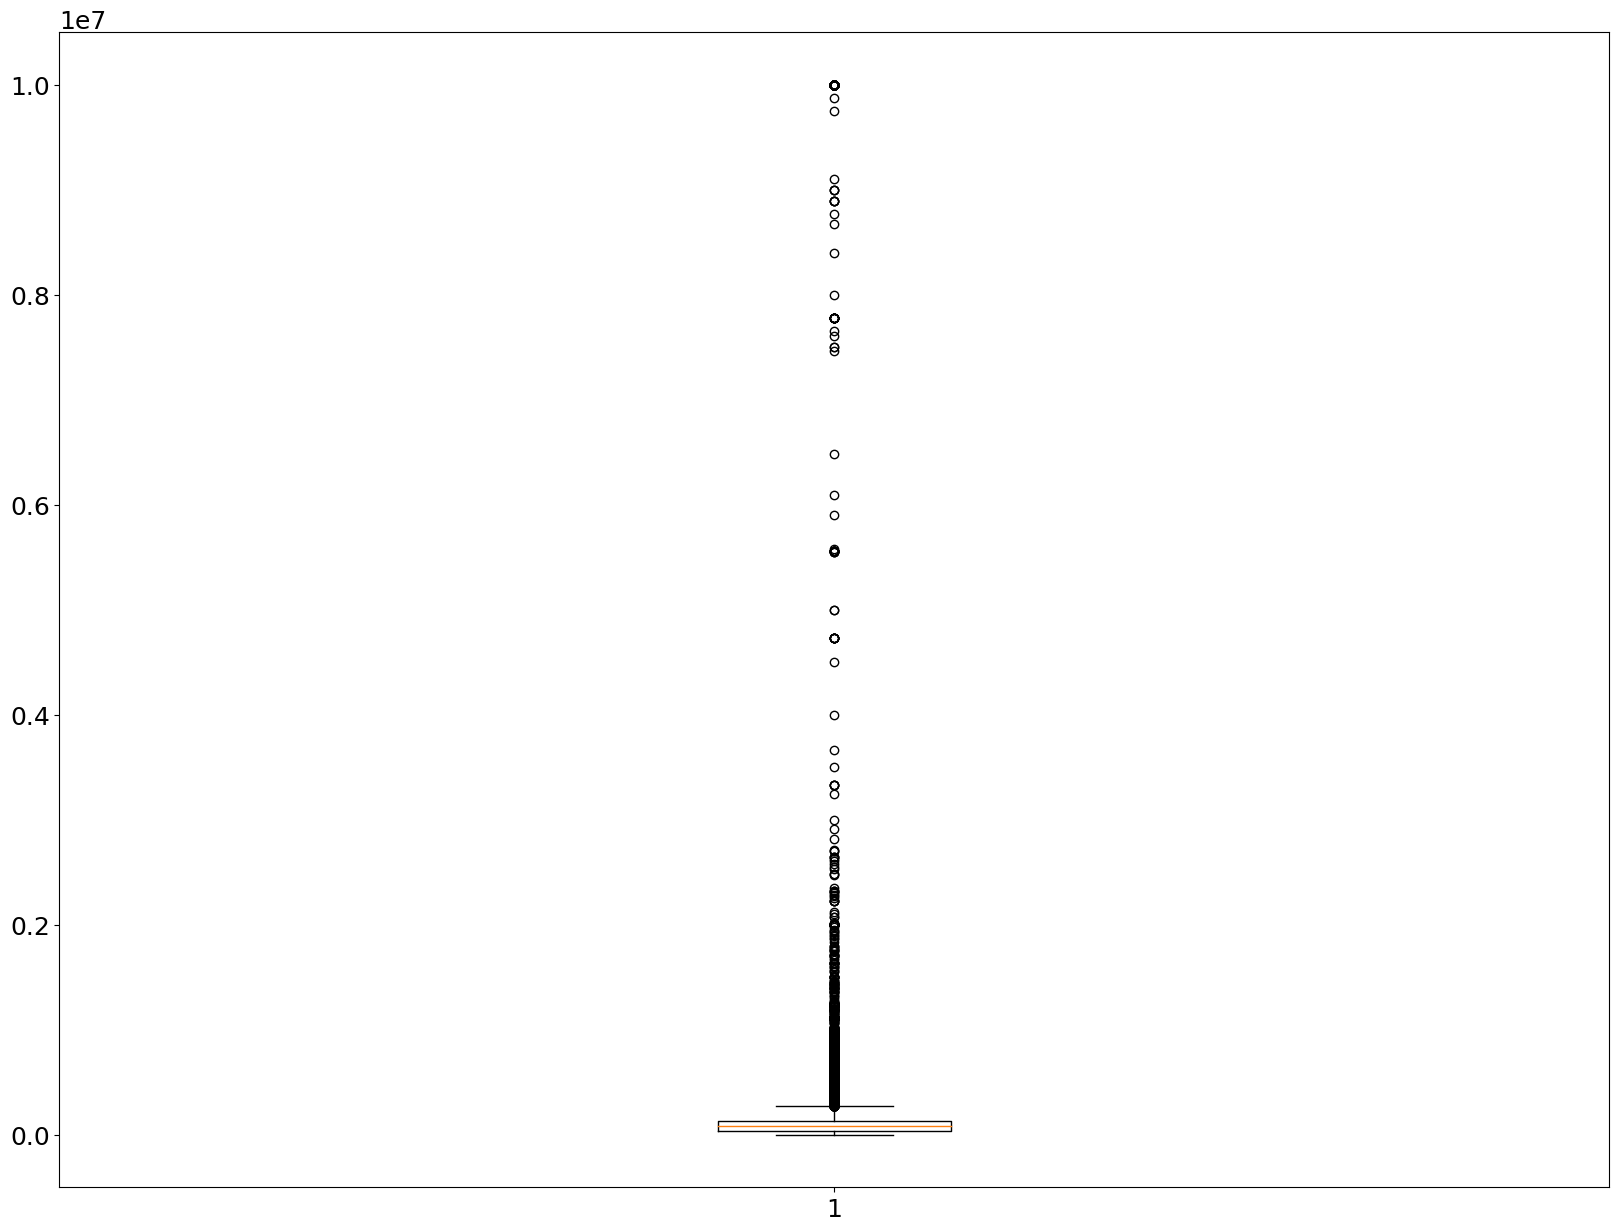

In [227]:
plt.boxplot(df1['odometer'].dropna())
plt.show()

In [228]:
df1['odometer'].describe()

count    4.222760e+05
mean     9.802867e+04
std      2.133544e+05
min      0.000000e+00
25%      3.772500e+04
50%      8.555900e+04
75%      1.335665e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [175]:
df2 = df1.copy().dropna(subset=['odometer'])

In [235]:
percentiles = np.percentile(df2['odometer'], [5, 99])

# Remove any data point outside the percentile range
df3 = df2[(df2['odometer'] >= percentiles[0]) & (df2['odometer'] <= percentiles[1])]


In [236]:
df3['odometer'].describe()

count    290705.000000
mean      82431.506513
std       52693.600249
min        6567.000000
25%       36741.000000
50%       76430.000000
75%      118158.000000
max      255000.000000
Name: odometer, dtype: float64

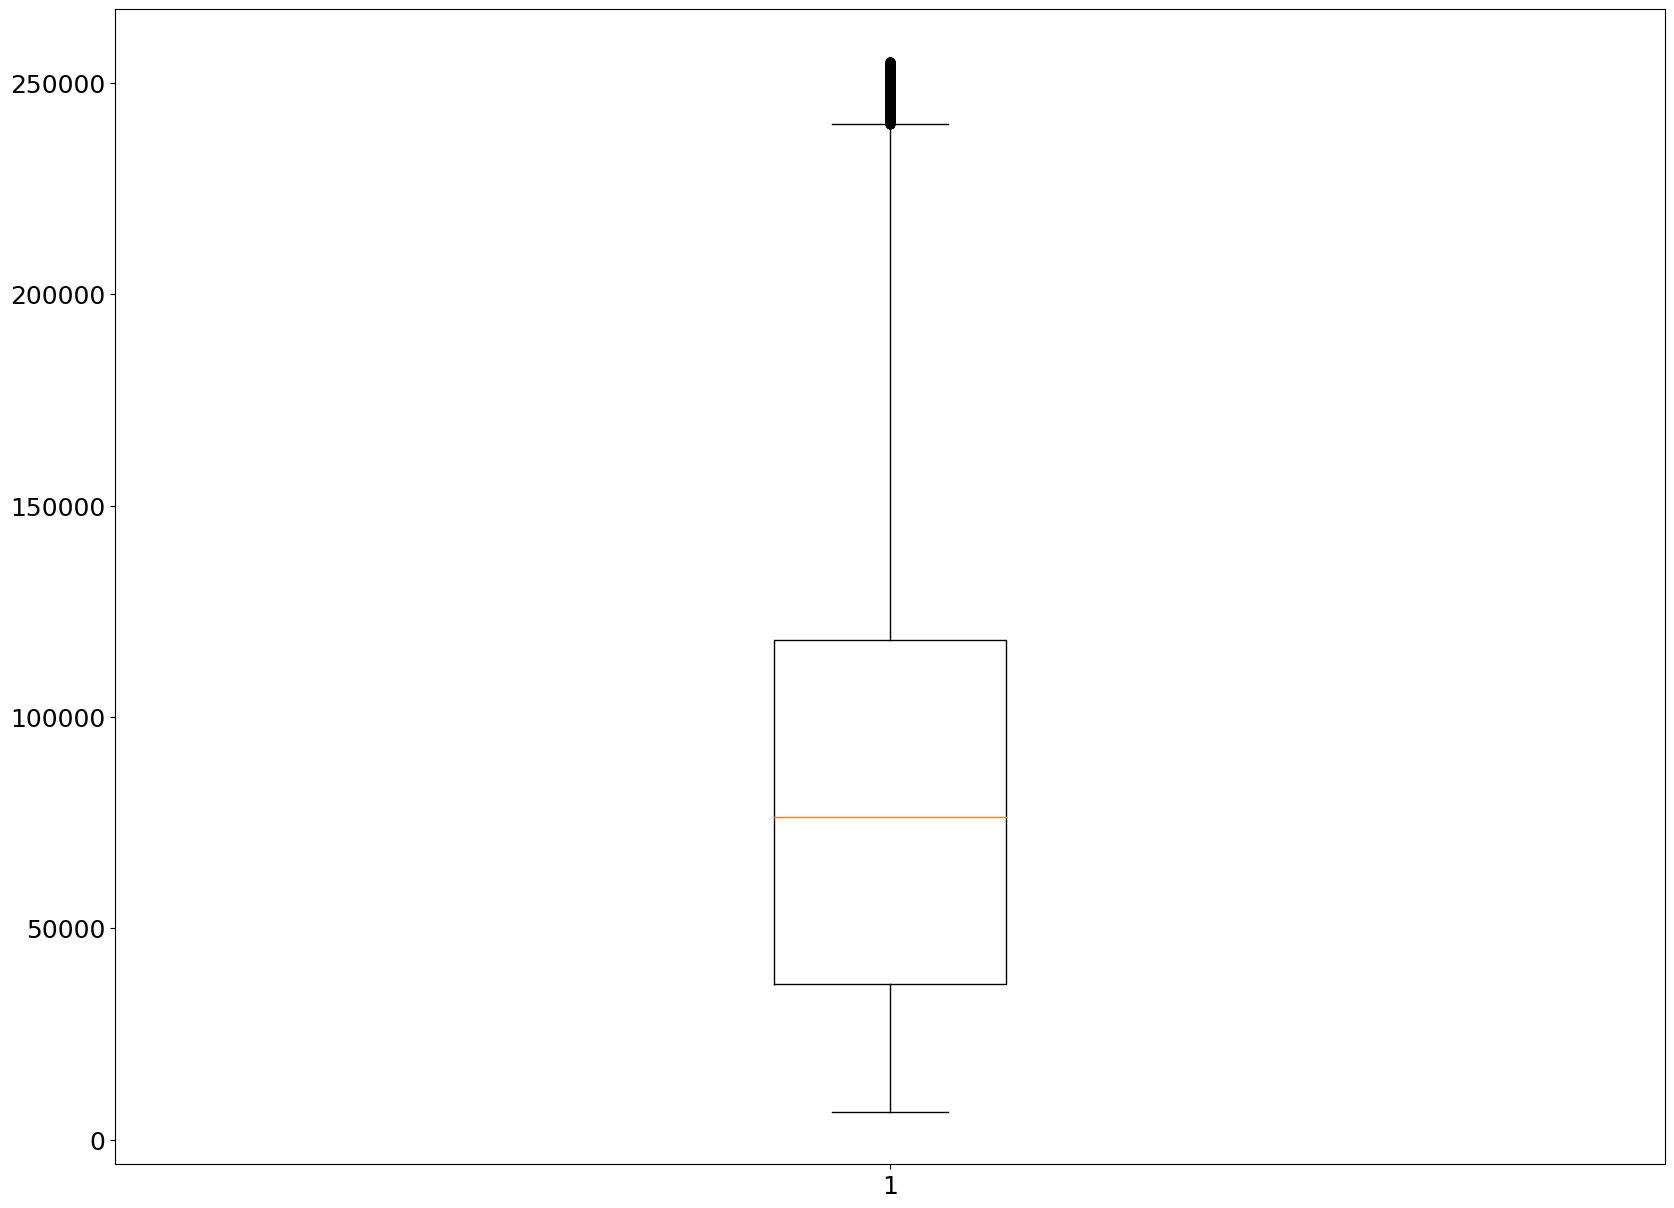

In [237]:
plt.boxplot(df3['odometer'])
plt.show()

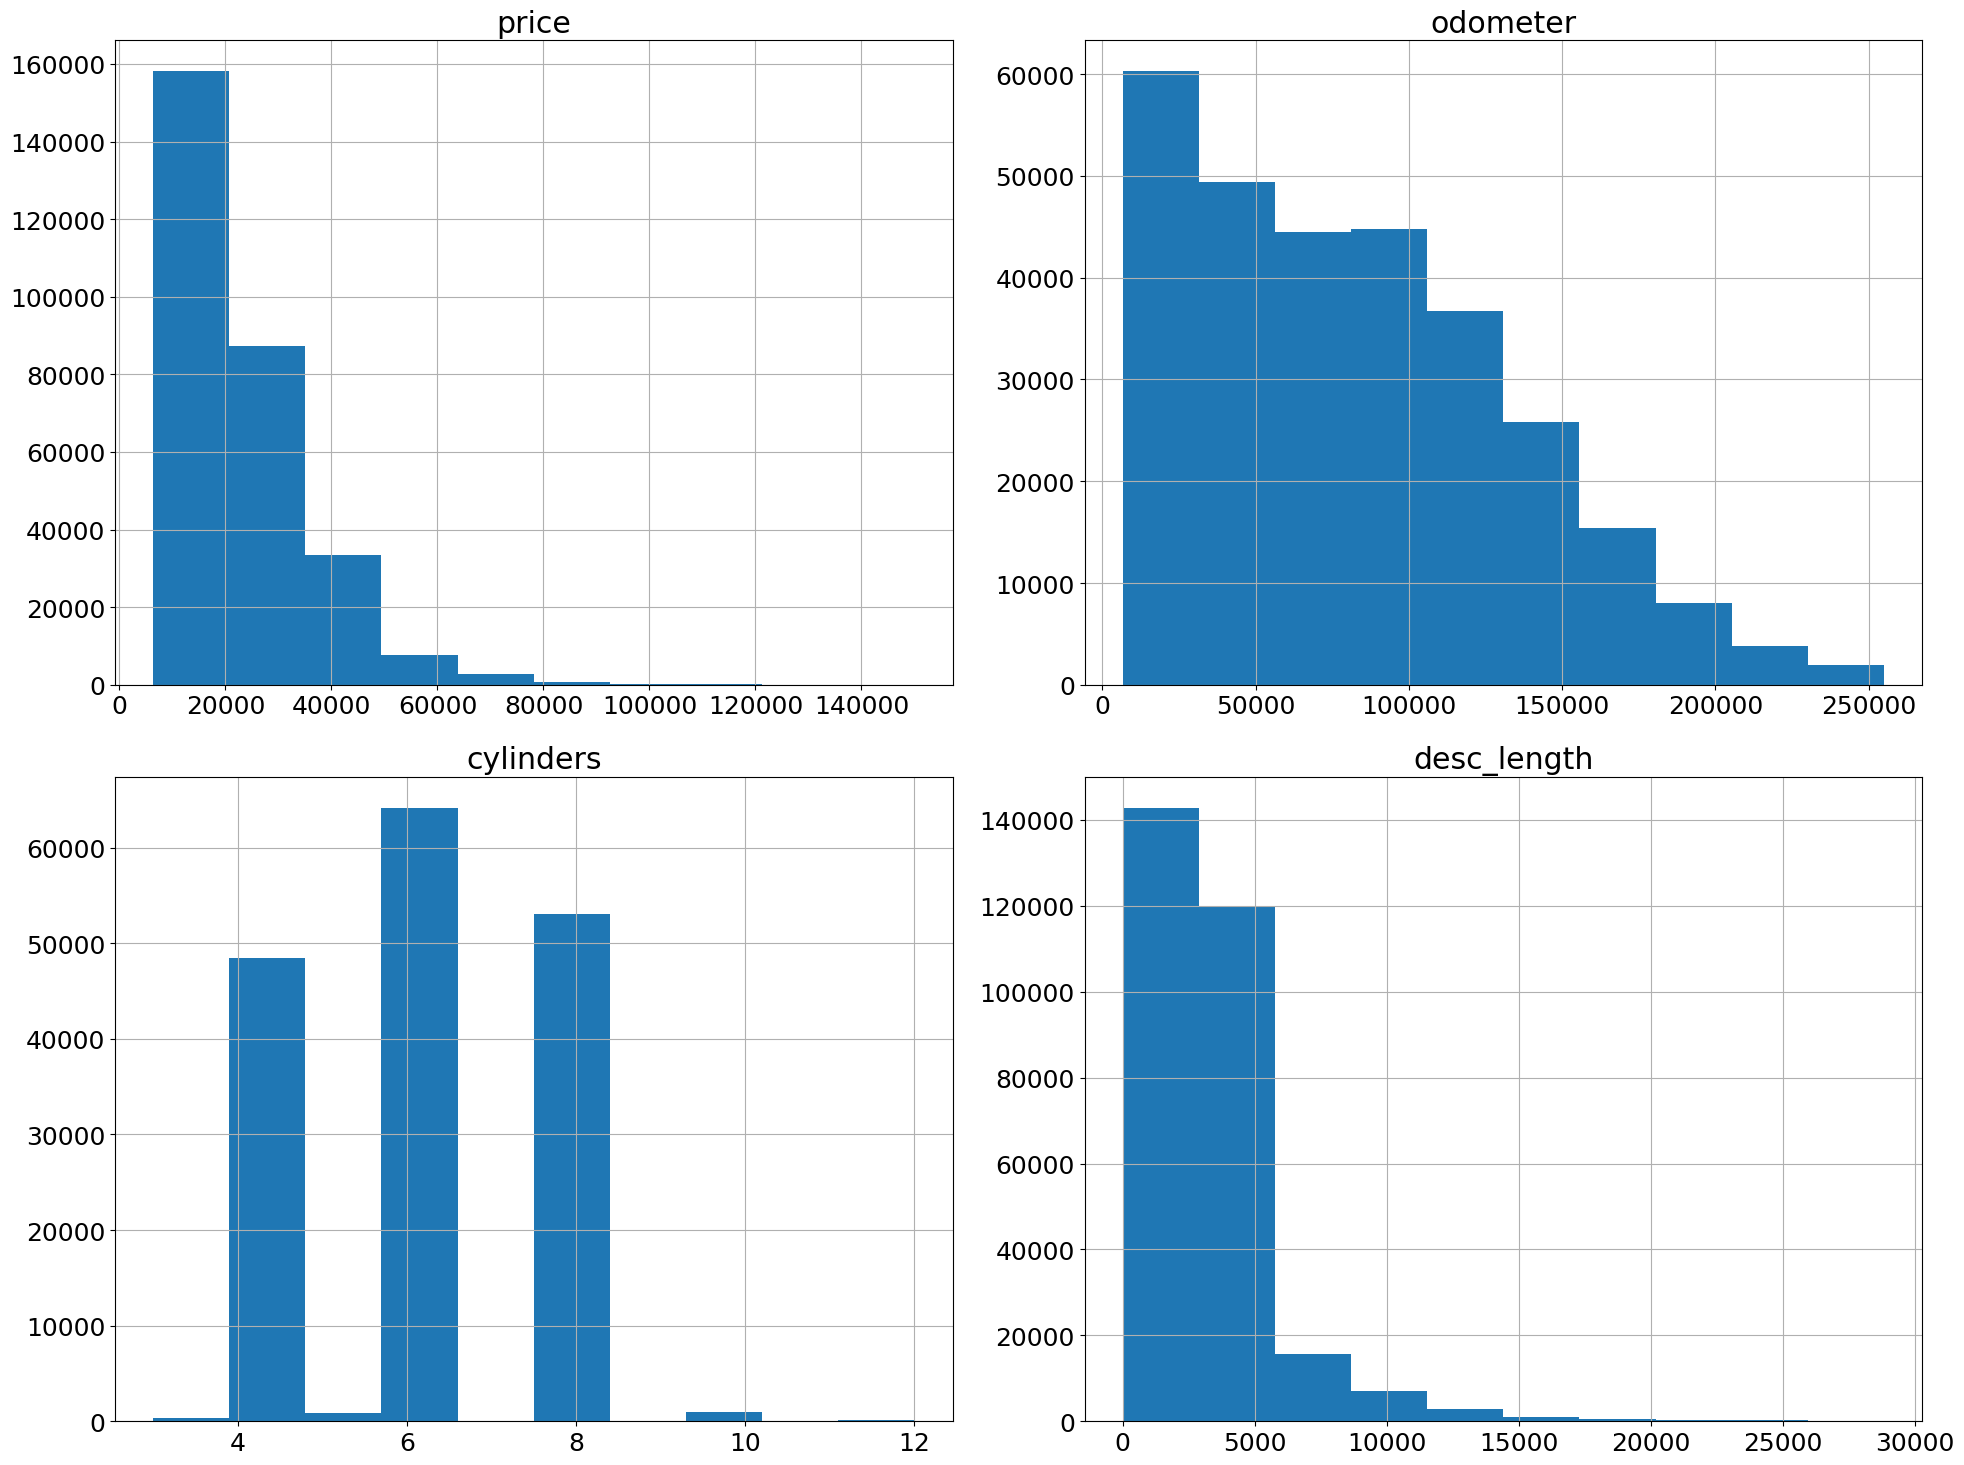

In [238]:
df3[['price','odometer','cylinders','desc_length']].hist()
plt.tight_layout()
plt.show()

In [255]:
null_perc = df3.isnull().sum() / df3.shape[0]
null_perc[null_perc > 0.01]

manufacturer    0.032115
condition       0.394895
cylinders       0.422294
title_status    0.017072
VIN             0.308546
drive           0.289300
size            0.742636
type            0.183623
paint_color     0.268901
county          1.000000
lat             0.010564
long            0.010564
dtype: float64

In [295]:
df4 = df3.copy()

In [296]:
# remove rows where these columns has na's; because they have a small 
# percentage of null values.
df4.dropna(subset=['year','manufacturer','model','fuel',
                   'transmission','title_status'],inplace=True)

In [297]:
# impute cylinders
median = df4['cylinders'].median()

df4['cylinders'].fillna(median,inplace=True)

In [298]:
null_perc = df4.isnull().sum() / df4.shape[0]
null_perc[null_perc > 0.01]

condition      0.391763
VIN            0.309830
drive          0.284358
size           0.739035
type           0.182600
paint_color    0.258952
county         1.000000
lat            0.011089
long           0.011089
dtype: float64

In [299]:
df4.loc[:,['condition', 'VIN', 'drive', 'type', 'paint_color']] = df4.loc[:,['condition', 'VIN', 'drive', 'type', 'paint_color']].fillna('n/a')

In [300]:
null_perc = df4.isnull().sum() / df4.shape[0]
null_perc[null_perc > 0.01]

size      0.739035
county    1.000000
lat       0.011089
long      0.011089
dtype: float64

In [301]:
df4['VIN'] = df4['VIN'].apply(lambda x: 'has_vin' if (x!='n/a') else 'no_vin')

In [302]:
df4.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'desc_length'],
      dtype='object')

In [303]:
df5 = df4.drop(['url','region_url',
          'region','size','county',
          'description','lat','long','image_url','state','posting_date','id'],axis=1)

In [304]:
df5.isnull().sum() / df4.shape[0]

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
VIN             0.0
drive           0.0
type            0.0
paint_color     0.0
desc_length     0.0
dtype: float64

In [305]:
# df5['constant'] = 1
df5['age'] = 2023 - df4['year']

In [306]:
df5.head(2)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,desc_length,age
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,has_vin,n/a,pickup,white,4347,9.0
28,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,has_vin,n/a,pickup,blue,4560,13.0


In [307]:
df5.isnull().any()

price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
VIN             False
drive           False
type            False
paint_color     False
desc_length     False
age             False
dtype: bool

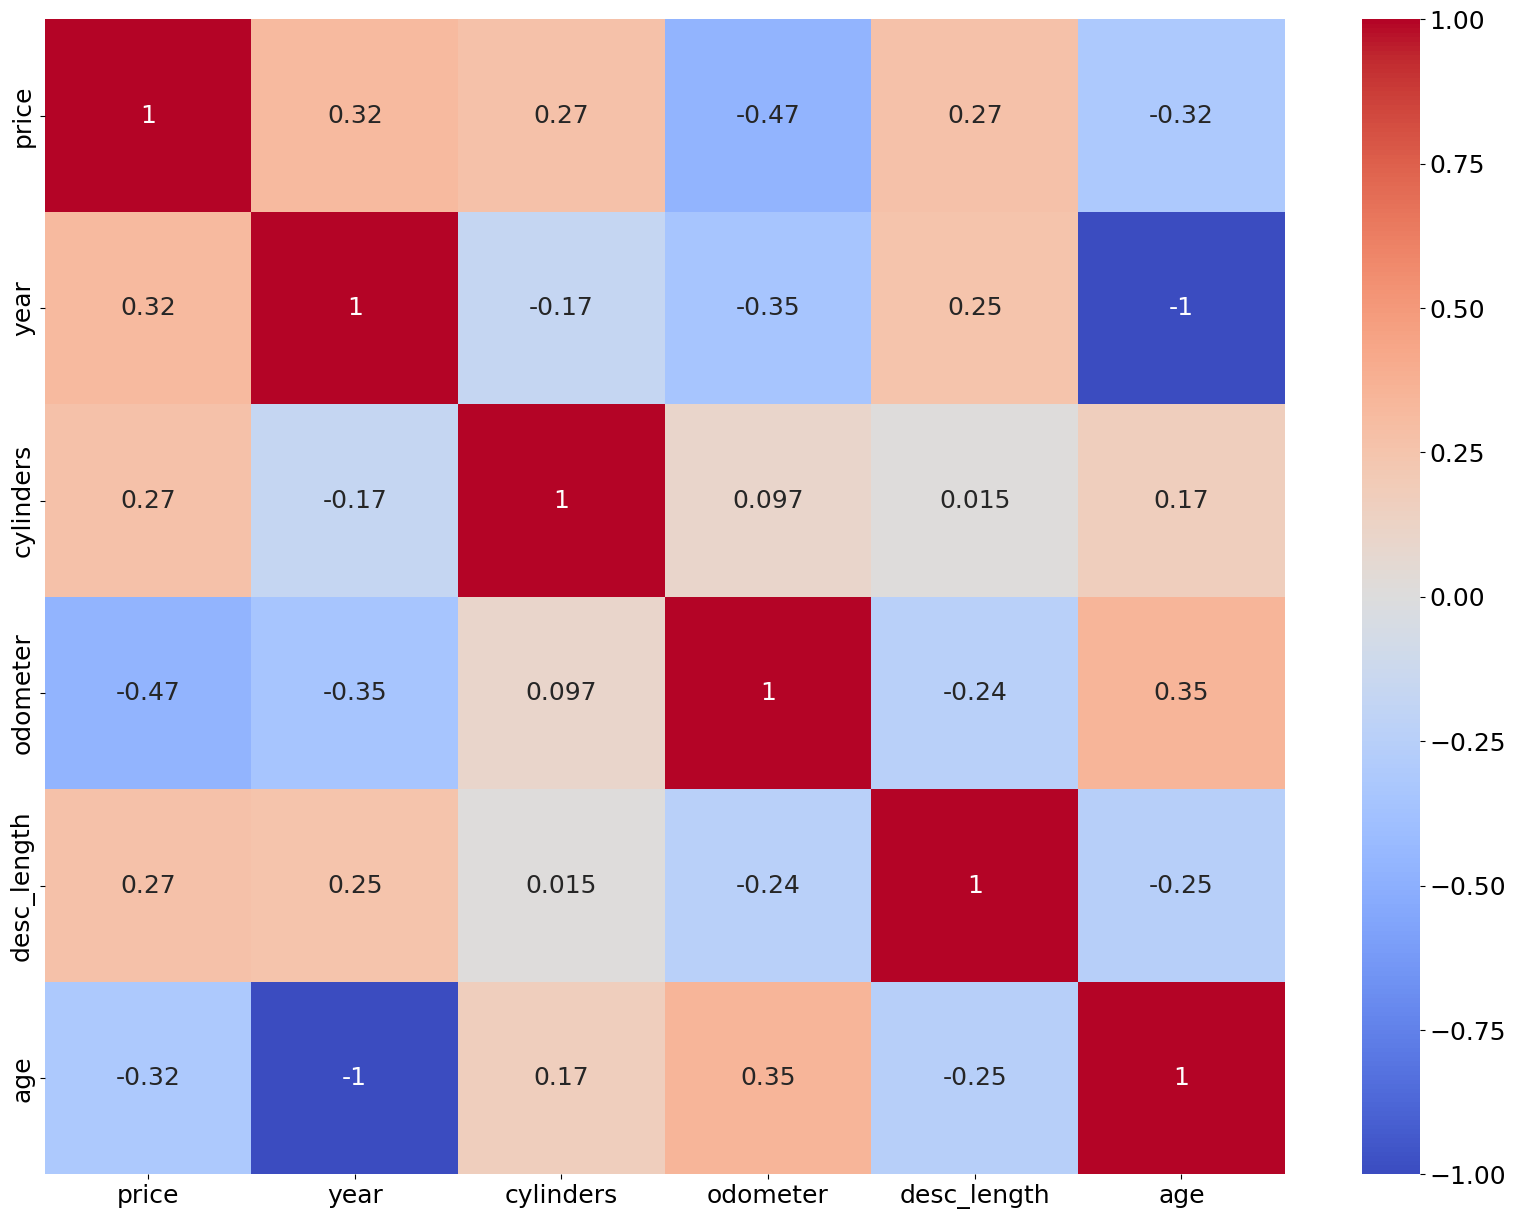

In [315]:
# check for correlation (we need independent variables and 
# so a high correlation need to be removed)
corr = df5.select_dtypes('number').corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

## Simple linear regression for year

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [336]:
X1 = df5[['odometer']].values
y1 = df5[['price']].values

In [369]:
 X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [370]:
reg_model = LinearRegression()
reg_model.fit(X_train1,y_train1)

LinearRegression()

In [371]:
# 22.3% of variance is explained by odomoter wrt to price
reg_model.score(X_train1,y_train1)

0.22310087129190603

In [372]:
reg_model.coef_

array([[-0.11944536]])

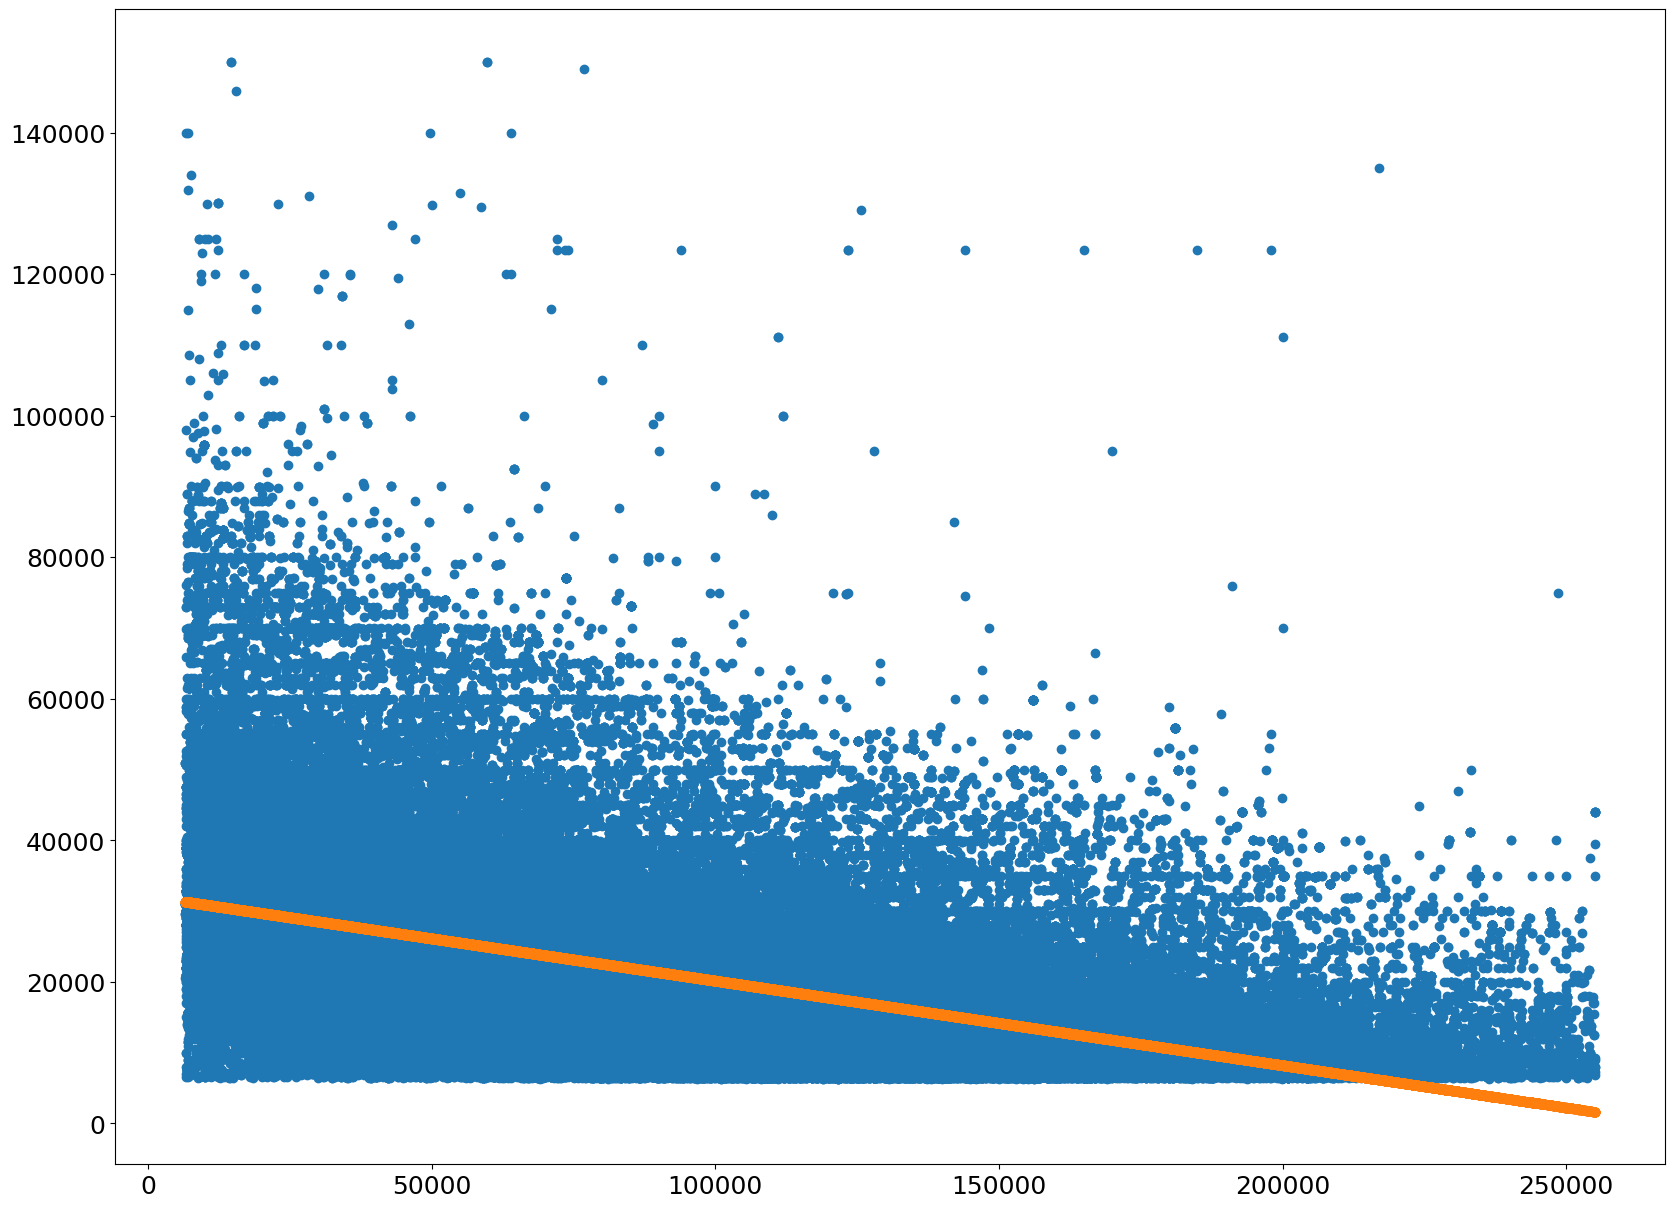

In [374]:
y_hat1 = reg_model.predict(X_train1)

plt.scatter(X_train1,y_train1)
plt.scatter(X_train1,y_hat1)
plt.show()

In [377]:
y_hat_test1 = reg_model.predict(X_test1)

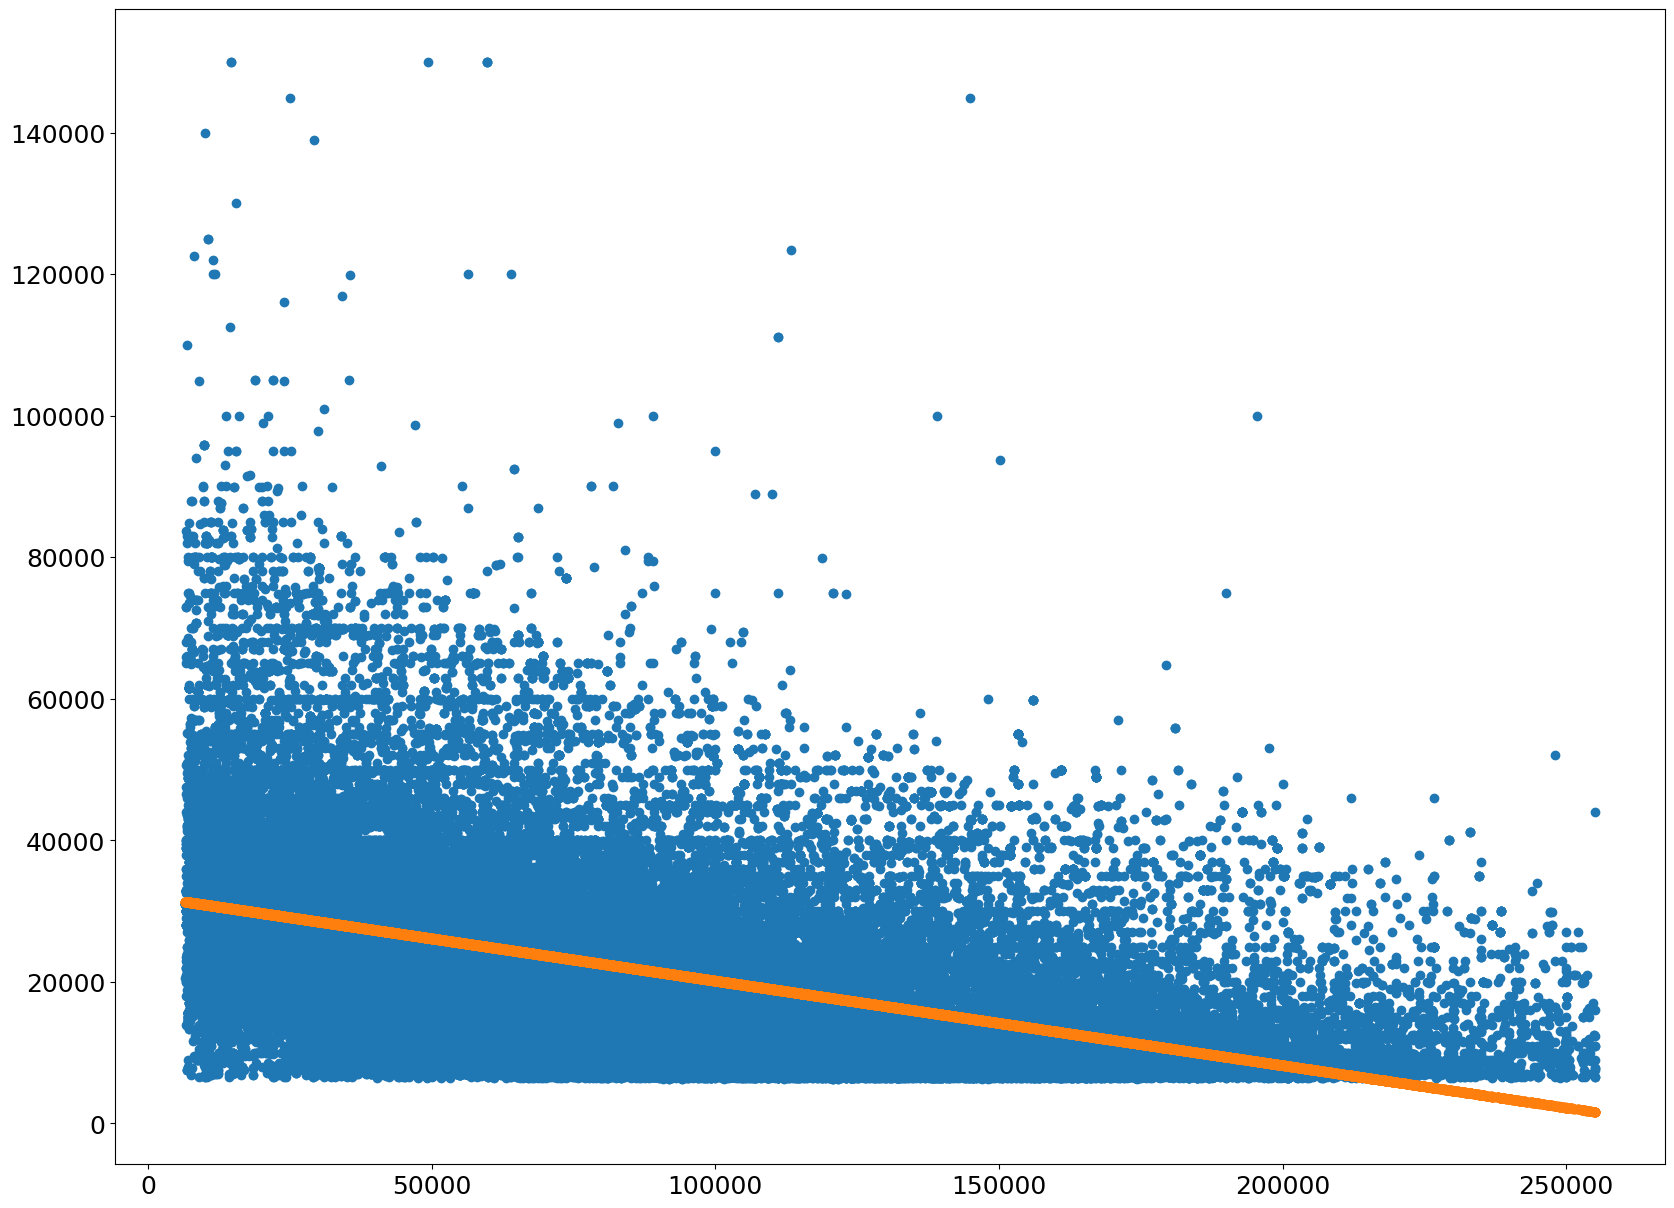

In [378]:
plt.scatter(X_test1, y_test1)
plt.scatter(X_test1, y_hat_test1)
plt.show()

In [381]:
mae = mean_absolute_error(y_test1,y_hat_test1)
rmse = math.sqrt(mean_squared_error(y_test1,y_hat_test1))

print('Mean absolute error : ', mae)
print('Root Mean squared error : ', rmse)

Mean absolute error :  8823.987249120999
Root Mean squared error :  11757.301781911237


In [384]:
df5['constant'] = 1

In [385]:
import statsmodels.api as sm

X1b = df5[['constant','odometer']]
y1b = df5.price.values

X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.3, random_state=0)

reg_sm1b = sm.OLS(y_train1b, X_train1b).fit()
reg_sm1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                 5.460e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:33:03   Log-Likelihood:            -2.0512e+06
No. Observations:              190138   AIC:                         4.102e+06
Df Residuals:                  190136   BIC:                         4.102e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    3.211e+04     49.824    644.533      0.000     3.2e+04    3.22e+04
odometer      -0.1194      0.001   -233.669      0.000      -0.120      -0.118
==============================================================================
Omnibus:                    61774.445   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256345.272
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                       7.749   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This output shows the results of a simple linear regression model with one predictor variable (odometer) and one outcome variable (y). Here are the key pieces of information:

R-squared: This measures the proportion of variance in the outcome 
    variable (y) that can be explained by the predictor variable 
    (odometer). The value of 0.223 indicates that 22.3% of the 
    variability in y can be explained by odometer.
    
Coefficients: The coefficient for odometer is -0.1194. This means that
    for every one unit increase in odometer, the predicted value of y 
    decreases by 0.1194 units, holding all other variables constant.
    
Standard errors: These show the precision of the estimated coefficients. 
    The standard error for odometer is 0.001, which means that the 
    estimated coefficient is expected to be within 0.001 units of the 
    true coefficient about 68% of the time.
    
t-statistics and p-values: These show the statistical significance of 
    the estimated coefficients. The t-value for odometer is -233.669 
    and the p-value is less than 0.001, indicating that the 
    relationship between odometer and y is statistically significant.
    
Omnibus, Durbin-Watson, Jarque-Bera, Skew, and Kurtosis: These are 
    diagnostic tests for assumptions of the regression model. The 
    Omnibus test indicates that there may be some non-normality in 
    the residuals, while the Jarque-Bera test confirms this and also 
    suggests some degree of skewness and kurtosis. The Durbin-Watson 
    test checks for autocorrelation in the residuals, and its value 
    of 2.000 suggests no significant autocorrelation.
    
AIC and BIC: These are information criteria that can be used to 
    compare different models. Lower values indicate better fit. 
    In this case, the AIC and BIC are the same at 4.102e+06.
    
Condition number: This measures the degree of multicollinearity in 
    the predictor variables. A large value (in this case, 1.81e+05) 
    suggests that there may be strong multicollinearity or other 
    numerical problems.

## Multiple Linear Regression : 

In [391]:
X2 = df5[['constant','age','odometer','cylinders','desc_length']]
y2 = df5['price'].values

In [392]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [393]:
model = sm.OLS(y_train2, X_train2).fit()

In [394]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 2.939e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:07:17   Log-Likelihood:            -2.0294e+06
No. Observations:              190138   AIC:                         4.059e+06
Df Residuals:                  190133   BIC:                         4.059e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constant     9834.9358    129.418     75.994      

In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [396]:
# to check if the variables have any correlation :
pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)

constant       29.147278
age             1.207966
odometer        1.175119
cylinders       1.036979
desc_length     1.106865
dtype: float64

In [397]:
#actual regression 
X3 = pd.get_dummies(df5[['constant','age','odometer','desc_length','cylinders','condition','fuel','VIN','type']])
y3 = df5.price.values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)

reg_sm3 = sm.OLS(y_train3, X_train3).fit()
reg_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     8603.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:41:32   Log-Likelihood:            -1.9974e+06
No. Observations:              190138   AIC:                         3.995e+06
Df Residuals:                  190109   BIC:                         3.995e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
constant             1.175e+04    123.599     95.044      0.000    1.15e+04     1.2e+04
age                  -311.3946      3.124    -99.679      0.000    -317.517    -305.272
odometer               -0.1213      0.000   -268.685      0.000      -0.122      -0.120
desc_length             0.4081      0.008     51.654      0.000       0.393       0.424
cylinders            2296.7956     19.319    118.888      0.000    2258.931    2334.660
condition_excellent  1891.3045    169.867     11.134      0.000    1558.369    2224.240
condition_fair      -1501.4420    381.534     -3.935      0.000   -2249.239    -753.645
condition_good       1288.1258    170.668      7.548      0.000     953.621    1622.631
condition_like new   3566.4331    182.187     19.576      0.000    3209.351    3923.515
condition_n/a        3635.3375    169.313     21.471      0.000    3303.489    3967.186
condition_new        5924.1000    456.770     12.970      0.000    5028.842    6819.358
condition_salvage   -3056.5366    933.255     -3.275      0.001   -4885.695   -1227.378
fuel_diesel          1.369e+04     97.588    140.264      0.000    1.35e+04    1.39e+04
fuel_electric        2279.3235    248.608      9.168      0.000    1792.058    2766.589
fuel_gas            -2321.6992     71.978    -32.256      0.000   -2462.774   -2180.624
fuel_hybrid         -2075.0747    156.017    -13.300      0.000   -2380.864   -1769.285
fuel_other            176.7632     90.590      1.951      0.051      -0.792     354.318
VIN_has_vin          6452.9468     66.922     96.425      0.000    6321.782    6584.112
VIN_no_vin           5294.3756     66.710     79.365      0.000    5163.626    5425.125
type_SUV             1008.9263     80.698     12.502      0.000     850.760    1167.093
type_bus             -444.4665    667.386     -0.666      0.505   -1752.528     863.595
type_convertible     2129.3726    152.151     13.995      0.000    1831.160    2427.586
type_coupe           1881.1294    113.259     16.609      0.000    1659.145    2103.114
type_hatchback      -5558.5530    119.211    -46.628      0.000   -5792.204   -5324.902
type_mini-van       -2683.8525    212.803    -12.612      0.000   -3100.942   -2266.763
type_n/a             1261.4586     83.205     15.161      0.000    1098.379    1424.539
type_offroad         7146.8845    501.792     14.243      0.000    6163.383    8130.386
type_other           2828.3135    106.152     26.644      0.000    2620.258    3036.369
type_pickup          5106.4422     87.463     58.384      0.000    4935.016    5277.868
type_sedan          -3516.1317     80.412    -43.726      0.000   -3673.738   -3358.526
type_truck           6010.7964     97.727     61.506      0.000    5819.253    6202.340
type_van             -389.3259    148.443     -2.623      0.009    -680.270     -98.382
typ

In [399]:
# get_dummies converted categorical columns to multiple 
# categorical columns and 1 - true, 0 -false 
X3.head(2)

,constant,age,odometer,desc_length,cylinders,condition_excellent,condition_fair,condition_good,condition_like new,condition_n/a,...,type_hatchback,type_mini-van,type_n/a,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,1,9.0,57923.0,4347,8.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
28,1,13.0,71229.0,4560,8.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [400]:
y_hat3 = reg_sm3.predict(X_test3) 

New RMSE :  8866.859126874879
Old RMSE (cylinders) :  11757.301781911237


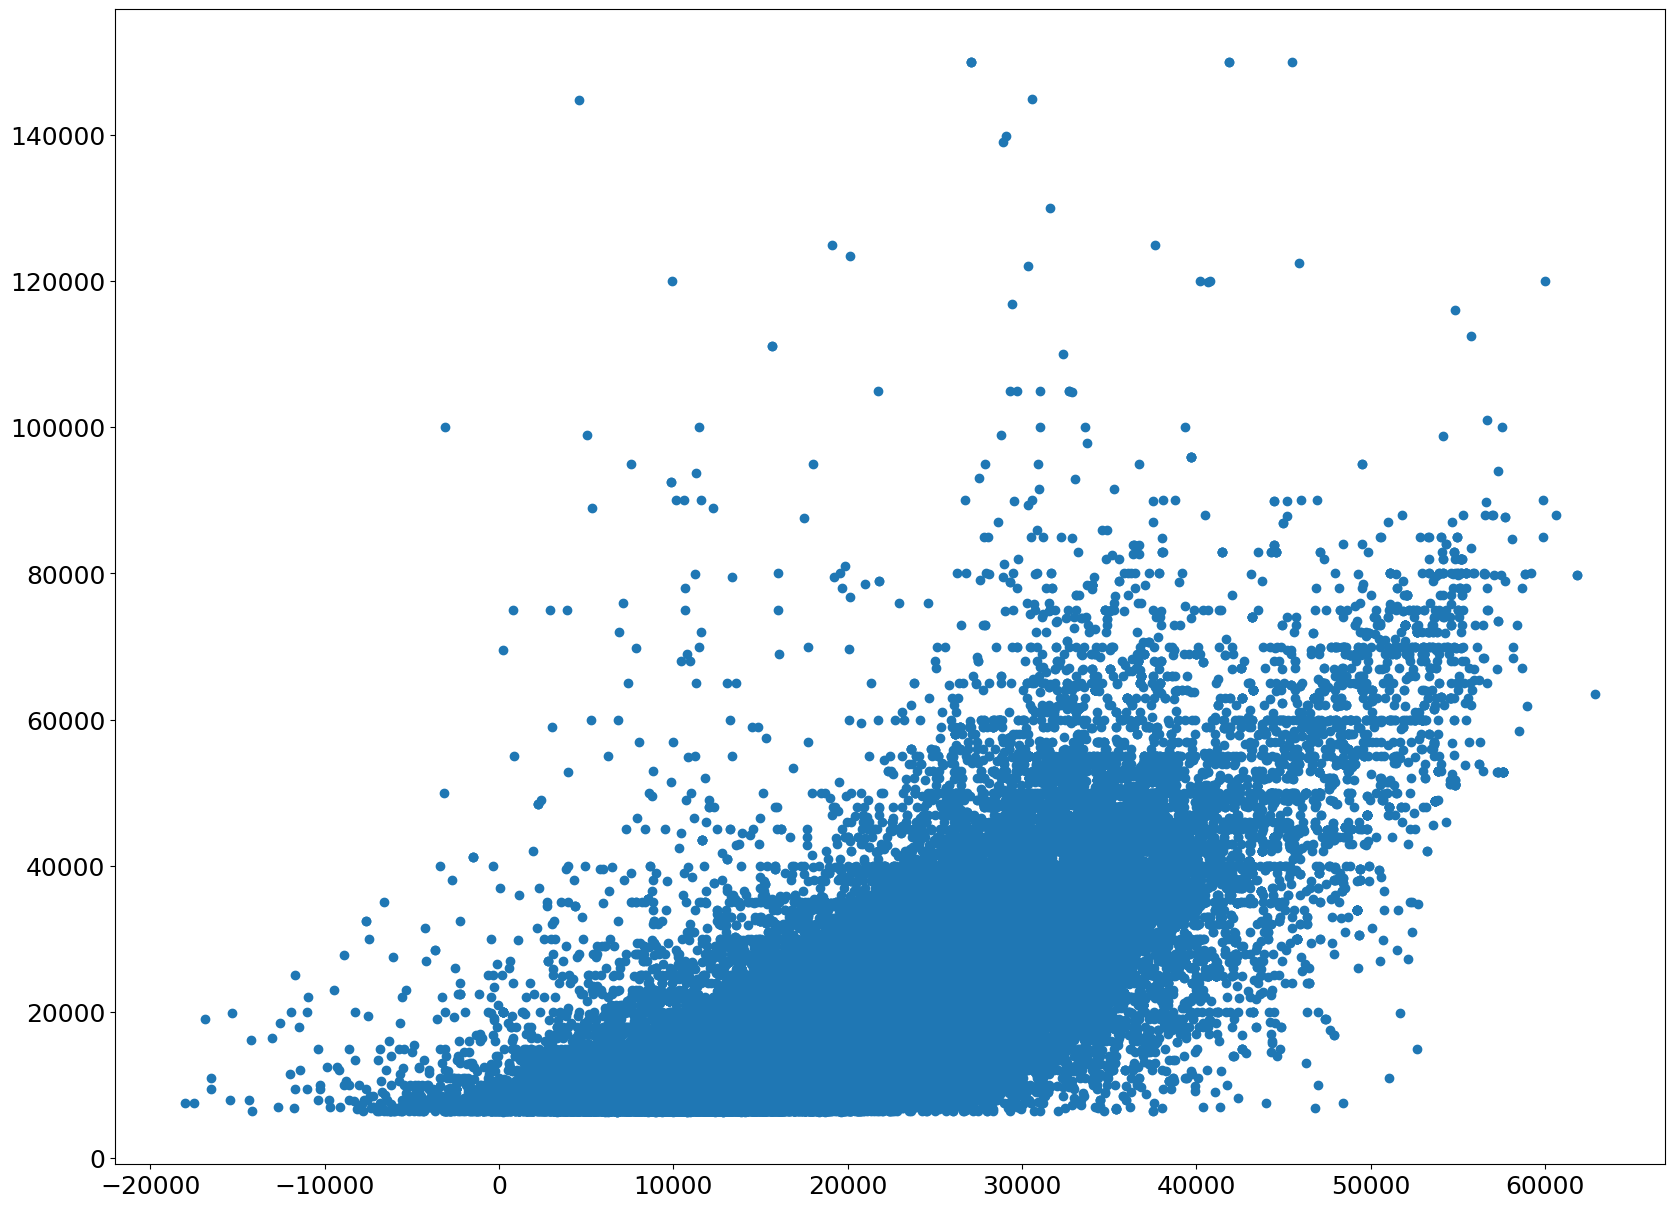

In [405]:
rmse3 = math.sqrt(mean_squared_error(y_hat3,y_test3))

print('New RMSE : ',rmse3)
print('Old RMSE (cylinders) : ',rmse)

plt.scatter(y_hat3,y_test3)
plt.show()

In [407]:
#cross validation 5 fold 
from sklearn.model_selection import cross_val_score 
X4 = pd.get_dummies(df5[['age','desc_length','odometer','cylinders','condition','fuel','VIN','type']])
y4 = df5.price.values

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=0)

reg4 = LinearRegression().fit(X_train4, y_train4)
reg4.score(X_train4,y_train4)

scores = cross_val_score(reg4,X4,y4, cv=5, scoring = 'neg_mean_squared_error')

np.sqrt(np.abs(scores))

array([9284.04430989, 8688.22938821, 8349.42504575, 8825.29696059,
       9235.06665588])

In [408]:
reg4 = LinearRegression()

scores = cross_val_score(reg4,X4,y4, cv=5, scoring = 'neg_mean_squared_error')

np.sqrt(np.abs(scores))

array([9284.04430989, 8688.22938821, 8349.42504575, 8825.29696059,
       9235.06665588])

In [410]:
# the above values are nearer to this rmse value, which means this model
# is representative of general data.
rmse3

8866.859126874879